<a href="https://colab.research.google.com/github/SAMPAYOVILLALBA/EDP1/blob/main/caminataaleatoria1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Huge \color{#C5A3A3}{\text{Caminata Aleatoria en 1D}}$$

Escribir un código que implemente una caminata aleatoria 1D, con probabilidad p de moverse a la derecha y probabilidad q de moverse a la izquierda, tal que

$$p + q = 1$$


Comenzamos a escribir el codigo para la parte de generar los numeros aleatoriamente, donde podemos editar el numero de pasos, p que es la probabilidad de ir a la derecha y cuantos datos queremos que nos muestre.


In [ ]:
import numpy as np

# Parámetros
n = 100        # Número de pasos
p = 0.5        # Probabilidad de ir a la derecha
q = 1 - p      # Probabilidad de ir a la izquierda

# Genera los pasos: +1 con prob p, -1 con prob q
pasos = np.random.choice([1, -1], size=n, p=[p, q])

# Mostrar los primeros 30 pasos
print(pasos[:30])


[ 1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1
  1  1  1 -1 -1 -1]


El codigo de abajo es para graficar esos numeros aleatorios.

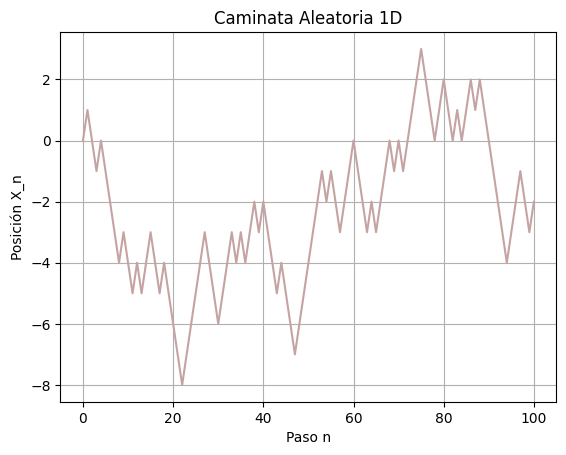

In [ ]:
import matplotlib.pyplot as plt

# Posición acumulada (X_n)
X = np.cumsum(pasos)

color_rosa = '#C5A3A3'

# Agregamos el punto inicial X0 = 0
X = np.insert(X, 0, 0)

# Grafica
plt.plot(X, color=color_rosa)
plt.title("Caminata Aleatoria 1D")
plt.xlabel("Paso n")
plt.ylabel("Posición X_n")
plt.grid(True)
plt.show()



$$\Large \color{#C5A3A3}{\text{Definicion del modelo}}$$

Sea $X_0 = 0$.

La caminata aleatoria se define por:

$$X_n = X_{n-1} + \xi_n$$

donde las variables aleatorias $\xi_n$ son independientes e idénticamente distribuidas tales que:

$$P(\xi_n = +1) = p$$

$$P(\xi_n = -1) = q$$

con

$$p + q = 1$$

$$\Large \color{#C5A3A3}{\text{Preguntas}}$$

**Pregunta 1:** Si la partícula inicia en el origen ($X_0 = 0$), ¿cuánto tiempo tarda en regresar a su posición inicial?

Definimos el tiempo de primer retorno como la variable aleatoria $T_0$:

$$T_0 = \min\{n \geq 1 : X_n = 0\}$$

Probabilidad de Retorno

De acuerdo con el análisis de recurrencia para una caminata aleatoria en una dimensión:

* Si $p = 0.5$ (Caminata Simétrica): La probabilidad de que la partícula regrese al origen es de exactamente $1$:
  $$P(T_0 < \infty) = 1$$
  Esto significa que el proceso es recurrente; es seguro que la partícula volverá al cero en algún momento.

* Si $p \neq 0.5$ (Caminata con Sesgo): La probabilidad de retorno es menor a $1$:
  $$P(T_0 < \infty) = 1 - |p - q|$$
  En este caso, el proceso es transitorio, existiendo una probabilidad real de que la partícula se aleje al infinito y nunca regrese.


Conclusión: Aunque la partícula regresa con probabilidad $1$, el tiempo promedio de espera es infinito. Esto se clasifica como un estado recurrente nulo, lo que explica por qué en las simulaciones algunas trayectorias pueden tardar miles de pasos en volver a cruzar el eje horizontal tras una desviación inicial.


**Pregunta 2:** En una caminata aleatoria de $n$ pasos, ¿existe una velocidad promedio constante a la que se desplaza?

La velocidad en este modelo discreto se define como el desplazamiento promedio por unidad de tiempo (paso). Partiendo de la esperanza de la posición final $E[X_n] = n(p - q)$, podemos definir la velocidad promedio $v$ como:

$$v = \frac{E[X_n]}{n} = p - q$$

Como $q = 1 - p$, la expresión se simplifica a:
$$v = 2p - 1$$

 Casos según la probabilidad $p$
* Caminata Simétrica ($p = 0.5$): $$v = 2(0.5) - 1 = 0$$
  En promedio, la velocidad es nula. La partícula no tiene una dirección preferencial y tiende a quedarse "cerca" del origen a largo plazo.

* Caminata con Sesgo ($p \neq 0.5$):
  La partícula posee una velocidad constante distinta de cero.
  * Si $p > 0.5$, la velocidad es positiva (hacia la derecha).
  * Si $p < 0.5$, la velocidad es negativa (hacia la izquierda).

**Conclusión:** Aunque cada paso individual es impredecible, el comportamiento global es determinista. A largo plazo, la aleatoriedad se desplaza como un todo con una velocidad constante de $p-q$ unidades por paso.



**Pregunta 3:** ¿Qué sucede con la posición de la partícula $X_n$ cuando el número de pasos $n$ tiende a infinito?

Al aumentar $n$, el sistema se rige por dos leyes fundamentales de la estadística:

1. La Ley Fuerte de los Grandes Números (Tendencia)

Para una caminata con probabilidad $p$, la posición promedio converge casi seguramente a la velocidad de deriva:
$$\lim_{n \to \infty} \frac{X_n}{n} = p - q$$
* Si $p \neq 0.5$, la partícula se aleja indefinidamente del origen hacia $+\infty$ o $-\infty$.
 2. El Teorema del Límite Central (Distribución)
Si centramos y normalizamos la variable $X_n$, su distribución converge a una Distribución Normal Estándar

Esto significa que, para un $n$ muy grande, la probabilidad de encontrar a la partícula en un intervalo dado se puede calcular mediante la campana de Gauss.


**Conclusión:** En el infinito, la caminata aleatoria pasa de ser un juego de azar discreto a un proceso de difusión continua donde la incertidumbre se distribuye de forma normal.

$$\Large \color{#C5A3A3}{\text{Conclusión}}$$
La solucion de este ejercicio planteado revela que la caminata aleatoria es más que una simple sucesión de pasos erráticos; es un sistema donde la libertad de cada salto termina cediendo ante la estructura de las leyes estadísticas. Al analizar la trayectoria, observamos que la presencia de un sesgo ($p \neq 0.5$) impone una velocidad promedio que dicta el destino final de la partícula, transformando el ruido aleatorio en una tendencia determinista. Pero, en el caso simétrico, nos enfrentamos a la naturaleza del proceso: aunque la partícula está "destinada" a regresar al origen con total certeza, el tiempo que requiere para hacerlo puede ser tan impredecible que se puede volver infinito.